###  1. Libraries

In [73]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Outliers detection
from scipy.stats import zscore

# Modelling libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, r2_score

### 2.  Data

#### 2.0. Data Understanding

##### 2.0.1 load dataset

In [2]:
# Load the data file
file_path = ("/home/munyao/Desktop/linear-regression/Data/1000_Companies.csv")
df = pd.read_csv(file_path,index_col = None)

##### 2.0.2 preview dataset

In [3]:
# Preview the data
df.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


##### 2.0.3 shape of our data before cleaning

In [4]:
# Shape of the dataset
print(f"The dataframe has {df.shape[0]} columns and {df.shape[1]} rows")

The dataframe has 1000 columns and 5 rows


##### 2.0.4 data types

In [5]:
# datatypes in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


>the data set contains 4 numerical columns and one categorical columns

##### 2.0.5 Descriptive Analysis

In [6]:
numeric_features = ['R&D Spend', 'Marketing Spend', 'Administration', 'Profit']
df[numeric_features + ['Profit']].describe()

,R&D Spend,Marketing Spend,Administration,Profit,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,226205.058419,122963.897612,119546.164656,119546.164656
std,46537.567891,91578.393542,12613.927535,42888.633848,42888.633848
min,0.000000,0.000000,51283.140000,14681.400000,14681.400000
25%,43084.500000,150969.584600,116640.684850,85943.198543,85943.198543
50%,79936.000000,224517.887350,122421.612150,117641.466300,117641.466300
75%,124565.500000,308189.808525,129139.118000,155577.107425,155577.107425
max,165349.200000,471784.100000,321652.140000,476485.430000,476485.430000


###### R&D Spend:
* The mean R&D spend is approximately $81,669.
* The standard deviation is around $46,538, indicating a significant variation in R&D expenditures among the companies.
* The minimum value is $0, meaning that some companies did not allocate any funds to R&D.
* The maximum value is $165,349.2, indicating the highest R&D spend among the companies.

###### Marketing Spend:
* The mean marketing spend is approximately $226,205.
* The standard deviation is about $91,578, indicating a wide range of marketing expenditures.
* The minimum value is $0, meaning that some companies did not invest in marketing.
* The maximum value is $471,784.1, indicating the highest marketing spend among the companies.

###### Administration:
* The mean administration cost is approximately $122,964.
* The standard deviation is relatively low at $12,614, suggesting that the administration costs are more consistent compared to R&D and marketing spends.
* The minimum value is $51,283.14, indicating the lowest administration cost among the companies.
* The maximum value is $321,652.14, indicating the highest administration cost among the companies.

###### Profit:
* The mean profit is approximately $119,546.
* The standard deviation is around $42,889, indicating a significant variation in profitability.
* The minimum profit recorded is $14,681.4, indicating that some companies experienced losses.
* The maximum profit recorded is $476,485.43, indicating the highest profitability among the companies.

#### 2.1. Data Cleaning
The cleaning process involved the following:
* irrelevant data
* duplicates
* structural errors
* missing data
* filter out outliers
* data validation

##### 2.1.0 duplicates

In [9]:
# Check to confirm before dropping duplicates
before_len = len(set(df.duplicated()))
print(f"Before: {before_len}")

# Dropping the duplicated row
df = df.drop_duplicates(keep='last')

# Check to confirm after dropping duplicates
print('after dropping')
len(set(df.duplicated()))

Before: 2
after dropping


1

> the dataset had only one duplicate and is droped.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 
 4   Profit           999 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.8+ KB


> the data set had no more duplicates

##### 2.1.1 missing data

In [11]:
# Check for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

> data had no missing values

##### 2.1.2 outliers

>outliers increase the variability the data, which decreases statistical power so there is need to deal with them.

### 3. EDA

##### 3.1. Distribution of Numerical Features

In [13]:
data = df.copy(deep=True)

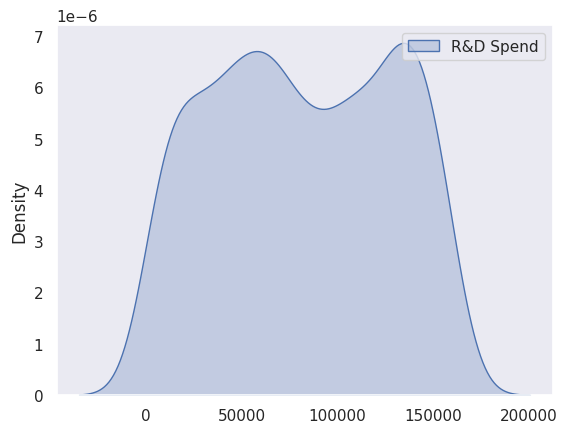

In [14]:
# R & D Spend
sns.set(style='dark',)
res = sns.kdeplot(data[numeric_features[:1]],fill=True)
plt.show()

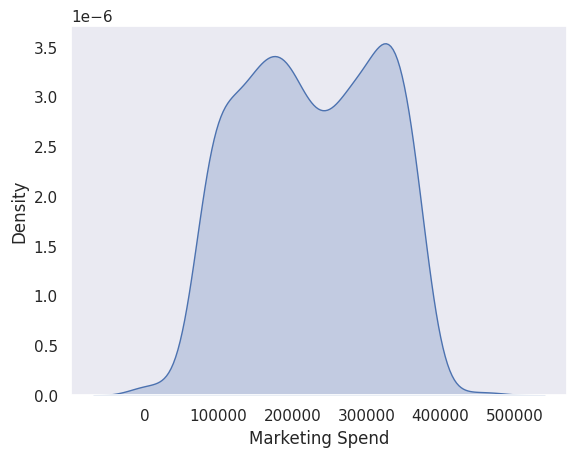

In [15]:
# Market Spending
sns.set(style='dark',)
res = sns.kdeplot(data[numeric_features[1]],fill=True)
plt.show()

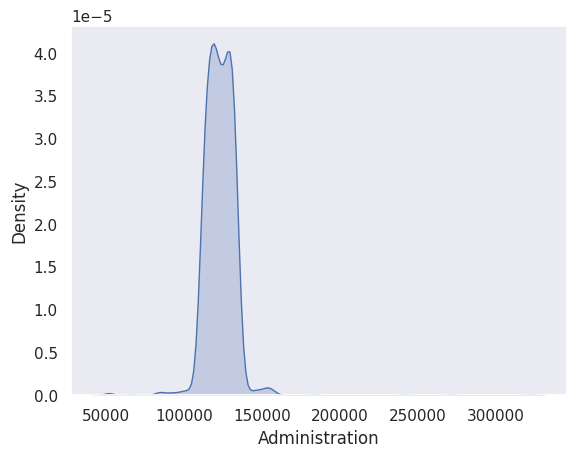

In [16]:
# Administration 
sns.set(style='dark',)
res = sns.kdeplot(data[numeric_features[2]],fill=True)
plt.show()

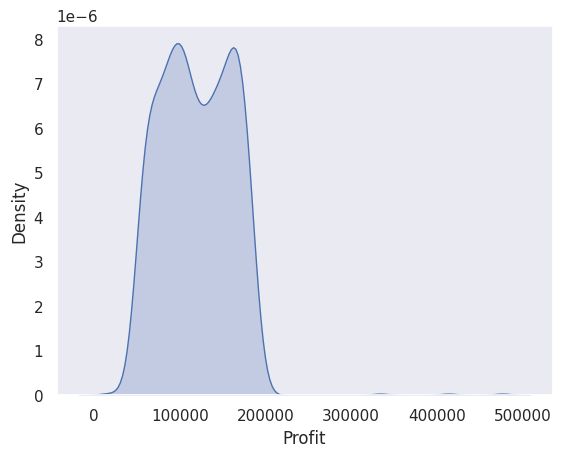

In [17]:
# Profit 
sns.set(style='dark',)
res = sns.kdeplot(data[numeric_features[3]],fill=True)
plt.show()

#### 3.2. Correlation Analysis

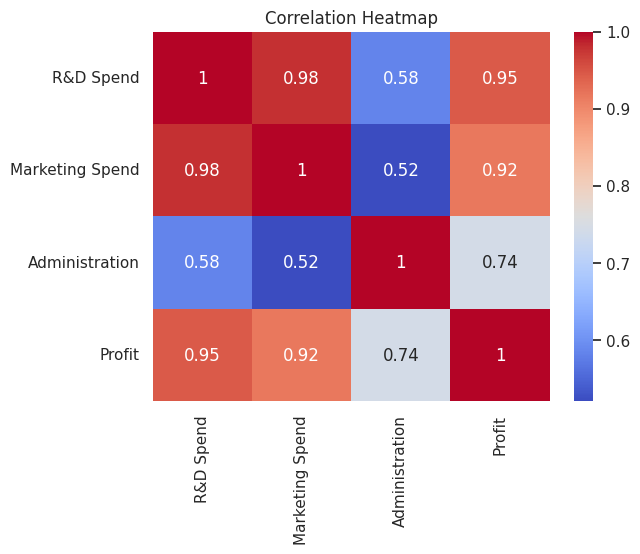

In [18]:
# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 
 4   Profit           999 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.8+ KB


#### 3.3. State-wise Profit Comparison

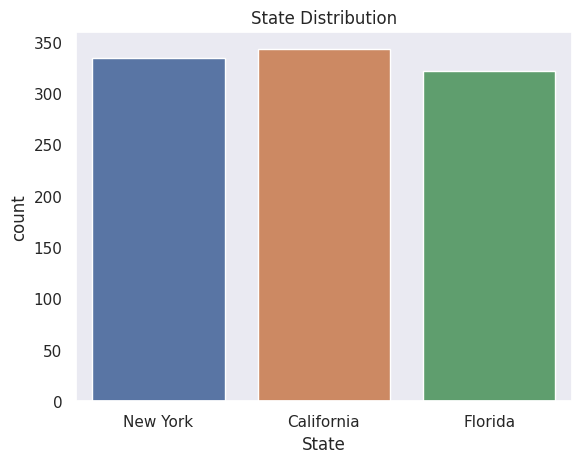

In [22]:
# Bar plot for State distribution
state_counts = df['State'].value_counts()
sns.countplot(data=df, x='State')
plt.title('State Distribution')
plt.show()


### Modeling 

In [29]:
# Split data into independent variables (X) and target variable (y)
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [53]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 799 rows
Test Set: 200 rows


#### Ensemble Algorithm

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=250, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2 score: ", r2)

RMSE:  160983463.23868257
R2 score:  0.9212551897849147


#### Regression Analysis

In [58]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [63]:
# predictions = model.predict(X_test)
# np.set_printoptions(suppress=True)
# print('Predicted labels: ', np.round(predictions)[:10])
# print('Actual labels   : ' ,y_test[:10])

# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Labels')
# plt.ylabel('Predicted Labels')
# plt.title('Profits Prediction')
# # overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show(

In [65]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 513708491.27978486
RMSE: 22665.13823650288
R2: 0.7972505451578711


#### Laso Algorithim

In [67]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# # Plot predicted vs actual
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Labels')
# plt.ylabel('Predicted Labels')
# plt.title('Daily Bike Share Predictions')
# # overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show()

Lasso() 

MSE: 513708496.9278568
RMSE: 22665.138361101104
R2: 0.7972505429287011


#### Decision Tree 

In [69]:
# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= 83241.00
|   |--- feature_0 <= 40895.00
|   |   |--- feature_0 <= 20049.79
|   |   |   |--- feature_0 <= 10058.00
|   |   |   |   |--- feature_0 <= 878.52
|   |   |   |   |   |--- feature_2 <= 22586.53
|   |   |   |   |   |   |--- feature_1 <= 93585.04
|   |   |   |   |   |   |   |--- value: [35673.41]
|   |   |   |   |   |   |--- feature_1 >  93585.04
|   |   |   |   |   |   |   |--- value: [42559.73]
|   |   |   |   |   |--- feature_2 >  22586.53
|   |   |   |   |   |   |--- value: [14681.40]
|   |   |   |   |--- feature_0 >  878.52
|   |   |   |   |   |--- feature_0 <= 5644.50
|   |   |   |   |   |   |--- feature_0 <= 3230.50
|   |   |   |   |   |   |   |--- feature_0 <= 1988.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 184568.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1451.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1242.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [50070.86]
|   |   | 

In [71]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# # Plot predicted vs actual
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Labels')
# plt.ylabel('Predicted Labels')
# plt.title('Daily Bike Share Predictions')
# # overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show()

MSE: 520314733.255152
RMSE: 22810.40844121718
R2: 0.794643206595637


#### Model Tuning

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 475986288.2494069
RMSE: 21817.109988479384
R2: 0.8121386699011465


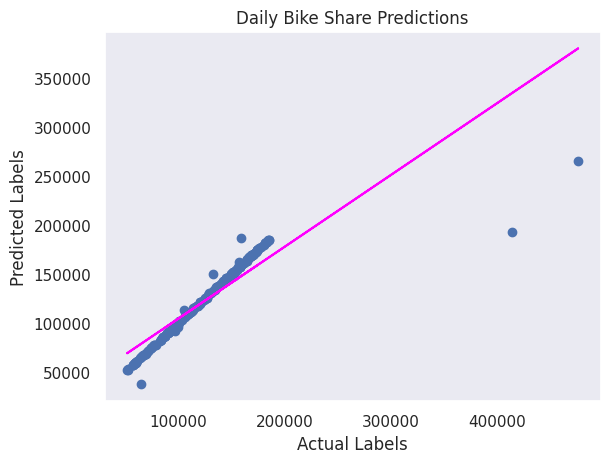

In [74]:
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Preprocess Data